**khushaldasparmar@gmail.com**
<br>
**Khushal Das**

**Linear Regression**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
reg_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
reg_df.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


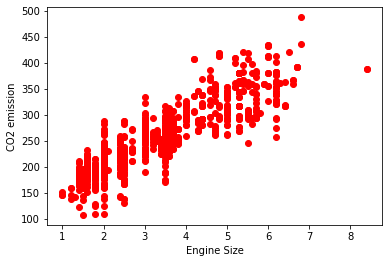

In [ ]:
plt.scatter(reg_df.ENGINESIZE,reg_df.CO2EMISSIONS,color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 emission')
plt.show()


**Now model parameter**

In [ ]:
indx = np.random.rand(len(reg_df)) <0.8
train = reg_df[indx]
test = reg_df[~indx]
train.shape

(856, 4)

In [ ]:
from sklearn import linear_model
lreg = linear_model.LinearRegression()


In [ ]:
train_x = np.asanyarray(train['ENGINESIZE'])
train_y = np.asanyarray(train['CO2EMISSIONS'])
lreg.fit(train_x.reshape(-1,1),train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Theta - 0 :",lreg.coef_)
print("Intercept - 1:",lreg.intercept_)

Theta - 0 : [38.82312122]
Intercept - 1: 125.78291125692212


In [ ]:
test_x = np.asanyarray(test['ENGINESIZE'])
test_y = np.asanyarray(test['CO2EMISSIONS'])
test_y_hat = lreg.predict(test_x.reshape(-1,1))


In [ ]:
test_y_hat

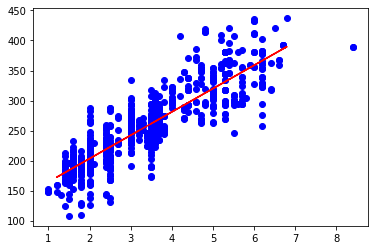

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(test_x,test_y_hat,'r-')
plt.show()


In [ ]:
print('Residual Error (MSE): %2f'  %np.mean(test_y -test_y_hat) **2)


Residual Error (MSE): 7.238379


In [ ]:
from sklearn.metrics import r2_score
print('R2 Score: %2f'%r2_score(test_y,test_y_hat))


R2 Score: 0.758719
